# Artificial Dataset - Blobs

Gerando um conjunto de 100 instâncias de treinamento para o problema Blobs

In [32]:
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np

def generate_data(n_samples, centers):
    X, Y = make_blobs(n_samples=n_samples, centers=centers, n_features=2, random_state=42)

    return X, Y

def train_model(model_type, X, Y):
    if model_type == 'random_forest':
        model = RandomForestClassifier(random_state=42)
    elif model_type == 'logistic_regression':
        model = LogisticRegression(random_state=42)
    elif model_type == 'svm':
        model = SVC(probability=True, random_state=42)
    else:
        raise ValueError("Model type not supported")

    model.fit(X, Y)
    return model

def plot_initial_data(X, Y, centers, title):
    plt.subplot(1,4,1)
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='red', marker='s', label=f'Classe 0 em {centers[0]}')
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='green', marker='^', label=f'Classe 1 em {centers[1]}')

    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend()
    plt.grid(True)

def plot_data(Yhat, title,i):
    plt.subplot(1,4,i+2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=(1 - Yhat[:, 1]), cmap='RdYlGn')
    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.colorbar(label='Probabilidade de classe 1')


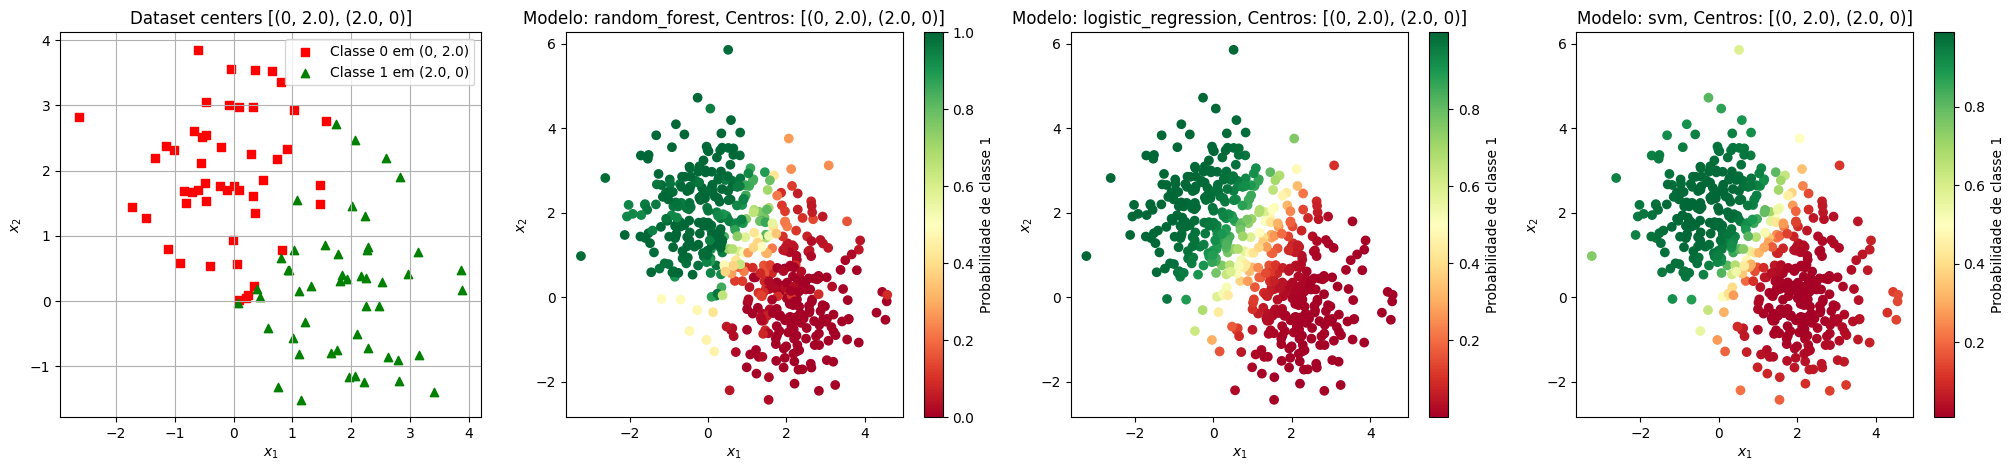

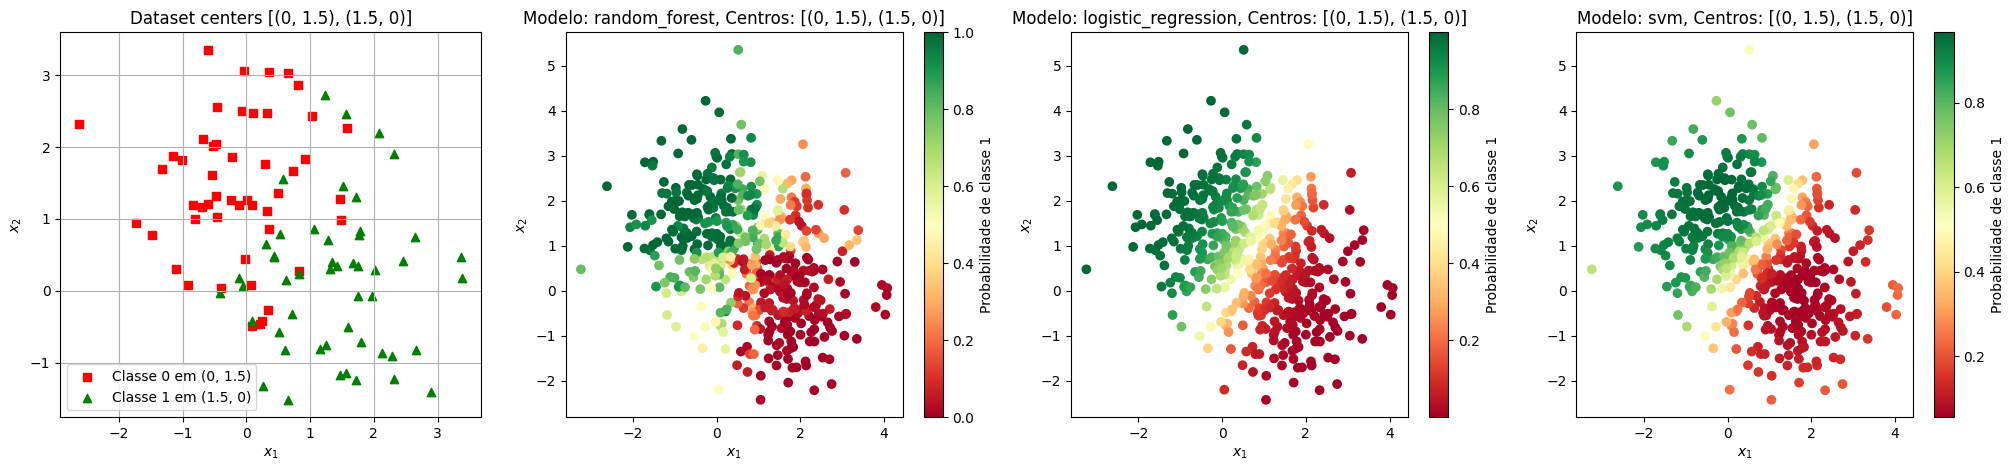

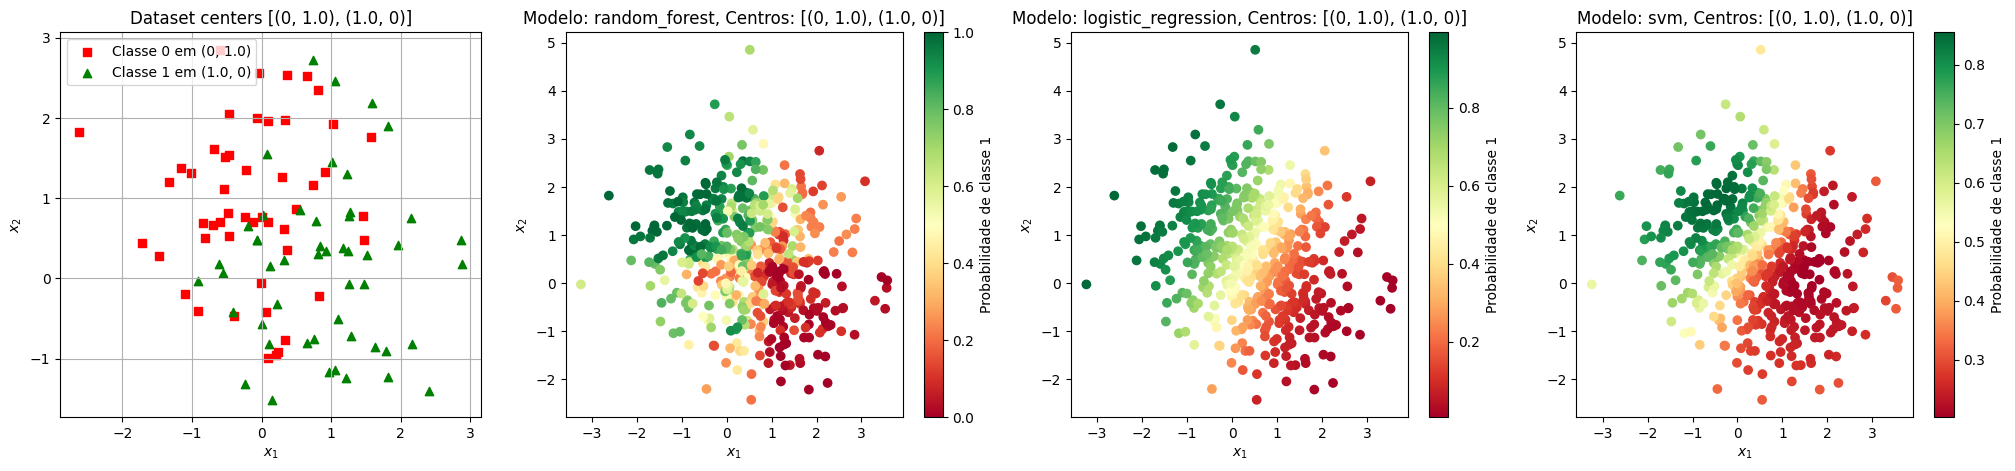

In [39]:
model_types = ['random_forest', 'logistic_regression', 'svm']
centers_list = [
[(0, 2.0), (2.0, 0)],
[(0,1.5), (1.5, 0)],
[(0, 1.0), (1.0, 0)]
]
for centers in centers_list:
  X, Y = generate_data(100, centers)
  title = f"Dataset centers {centers}"
  plt.figure(figsize=(25,5))
  plot_initial_data(X, Y, centers, title)
  X_test, _ = make_blobs(n_samples=500, centers=centers, n_features=2, random_state=42)
  for i,model_type in enumerate(model_types):

    model = train_model(model_type, X, Y)
    Yhat = model.predict_proba(X_test)

    title = f"Modelo: {model_type}, Centros: {centers}"

    plot_data(Yhat, title,i)

plt.show()

- A incerteza é claramente visualizada nos mapas de calor de probabilidade onde o verde (alta probabilidade para a classe 1) e o vermelho (baixa probabilidade para a classe 1) são dominantes, mas há uma quantidade significativa de amarelo, indicando regiões de decisão incerta.

- Ao mover os centros dos blobs mais próximos, observa-se um aumento na sobreposição dos dados. Isso resulta em maior incerteza na classificação, como evidenciado pela presença aumentada de cores intermediárias (amarelo) nas visualizações de probabilidade de cada modelo.

- Com os centros mais distantes, como em [(0, 2.0), (2.0, 0)], há menos sobreposição e, consequentemente, uma maior confiança e precisão nas classificações feitas pelos modelos.